In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Final_dataset.csv")

In [3]:
#change column names to make it clearer 
df.rename(columns={'bathrooms':'Number of bathrooms:'},inplace=True)
df.rename(columns={'bedrooms':'Number of bedrooms:'},inplace=True)
df.rename(columns={'beds':'Number of beds:'},inplace=True)
df.rename(columns={'security_deposit':'Amount of security deposits ($):'},inplace=True)
df.rename(columns={'cleaning_fee':'Amount of cleaning fee ($):'},inplace=True)
df.rename(columns={'guests_included':'Number of guests:'},inplace=True)
df.rename(columns={'extra_people':'Number of extra people:'},inplace=True)
df.rename(columns={'number_of_reviews':'Number of reviews:'},inplace=True)
df.rename(columns={'review_scores_rating':'Review scores rating (0-100):'},inplace=True)

In [4]:
df.head()

,Number of bathrooms:,Number of bedrooms:,Number of beds:,Amount of security deposits ($):,Amount of cleaning fee ($):,Number of guests:,Number of extra people:,Number of reviews:,Review scores rating (0-100):,Manhattan,Brooklyn,Queens,Entire_home,Private_room,Shared_room,price
0,1,0,1,350,100,2,0,46,95,1,0,0,1,0,0,225
1,1,1,1,300,125,2,100,75,89,1,0,0,1,0,0,200
2,1,1,1,500,75,2,15,94,95,1,0,0,1,0,0,116
3,1,1,2,0,40,2,10,161,94,1,0,0,1,0,0,150
4,1,1,1,450,75,1,0,53,93,1,0,0,1,0,0,135


In [5]:
# independent variables and dependent variable
x = df.iloc[:, 0:15].values
y = df.iloc[:, 15].values

In [6]:
# traing set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [7]:
# fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 64, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=64, random_state=0)

In [8]:
# predict y value using x test set
y_pred = regressor.predict(x_test)

In [9]:
# find correlation between y predict and y test
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
R2

0.8601316196554464

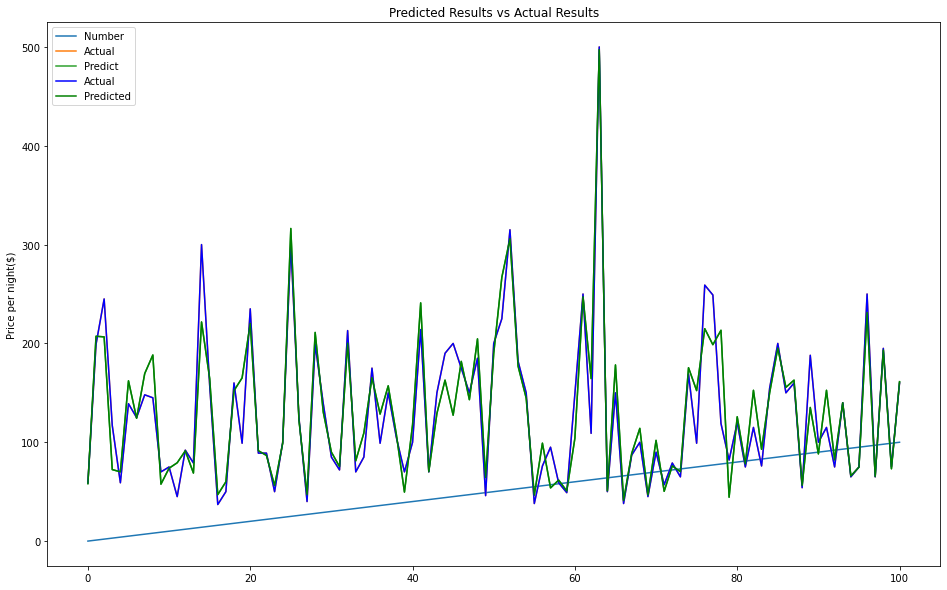

In [10]:
#1. Line plot
import matplotlib.pyplot as plt  
predict =regressor.predict(x_test)
df_test= pd.DataFrame({'Number':list(range(len(y_test))),'Actual':y_test,'Predict':predict})
df_test_100=df_test.head(101)
df_test_100.plot(figsize=(16,10))
Number = df_test_100['Number']
Actual = df_test_100['Actual']
Predict = df_test_100['Predict']
plt.plot(Number, Actual, 'b-', label='Actual')
plt.plot(Number, Predict, 'g-', label='Predicted')
plt.legend(loc='upper left')
plt.title('Predicted Results vs Actual Results')
plt.ylabel('Price per night($)')
plt.savefig('Predicted Results vs Actual Results1.png')

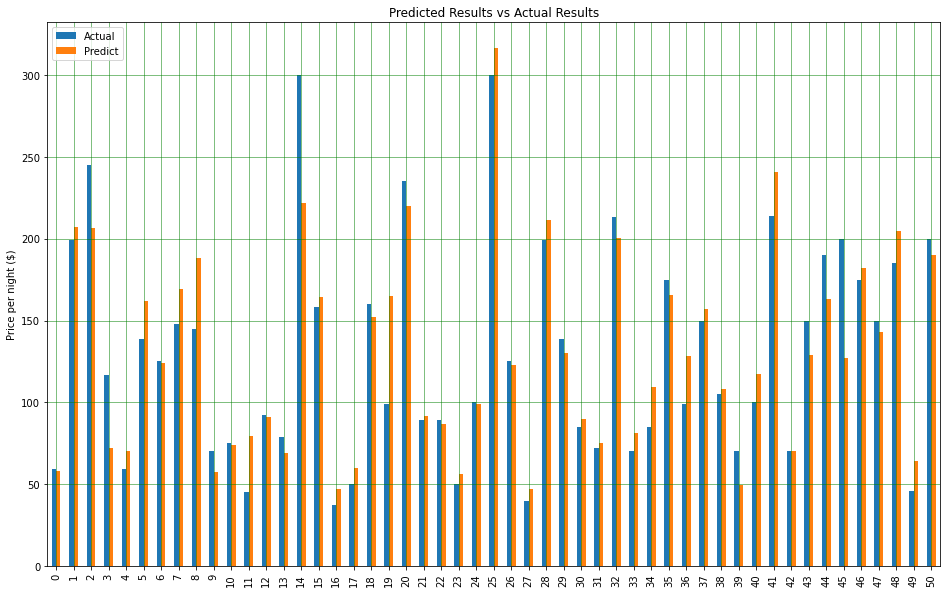

In [11]:
#2.Bar plot 
import matplotlib.pyplot as plt  
predict =regressor.predict(x_test)
df= pd.DataFrame({'Actual':y_test,'Predict':predict})
df1 = df.head(51)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend(loc='upper left')
plt.title('Predicted Results vs Actual Results')
plt.ylabel('Price per night ($)')
#plt.show()
plt.savefig('Predicted Results vs Actual Results2.png')